In [45]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [46]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

# 分類数設定

In [47]:
NUM_CLASSES = 20

# 学習データ読み込み

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                220       
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________


In [53]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
11/11 [==============================] - 0s 14ms/step - loss: 3.0316 - accuracy: 0.0387 - val_loss: 2.9854 - val_accuracy: 0.0494

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 2.9990 - accuracy: 0.0587 - val_loss: 2.9554 - val_accuracy: 0.0708

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 2.9645 - accuracy: 0.0573 - val_loss: 2.9261 - val_accuracy: 0.0794

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 2.9331 - accuracy: 0.0651 - val_loss: 2.8904 - val_accuracy: 0.1094

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 2.9076 - accuracy: 0.0880 - val_l


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
11/11 [==============================] - 0s 4ms/step - loss: 1.7065 - accuracy: 0.3873 - val_loss: 1.3981 - val_accuracy: 0.6052

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
11/11 [==============================] - 0s 3ms/step - loss: 1.6959 - accuracy: 0.3887 - val_loss: 1.3627 - val_accuracy: 0.5923

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
11/11 [==============================] - 0s 3ms/step - loss: 1.6962 - accuracy: 0.3966 - val_loss: 1.3414 - val_accuracy: 0.6309

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
11/11 [==============================] - 0s 3ms/step - loss: 1.6600 - accuracy: 0.4009 - val_loss: 1.3224 - val_accuracy: 0.6738

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
11/11 [==

11/11 [==============================] - 0s 3ms/step - loss: 1.2654 - accuracy: 0.5111 - val_loss: 0.8037 - val_accuracy: 0.8627

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
11/11 [==============================] - 0s 3ms/step - loss: 1.2239 - accuracy: 0.5225 - val_loss: 0.7966 - val_accuracy: 0.8476

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
11/11 [==============================] - 0s 3ms/step - loss: 1.2168 - accuracy: 0.5505 - val_loss: 0.7920 - val_accuracy: 0.8090

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
11/11 [==============================] - 0s 3ms/step - loss: 1.2375 - accuracy: 0.5304 - val_loss: 0.7842 - val_accuracy: 0.8305

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
11/11 [==============================] - 0s 3ms/step - loss: 1.2461 - accuracy: 0.5068 - val_loss: 0.775


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
11/11 [==============================] - 0s 4ms/step - loss: 1.0521 - accuracy: 0.5891 - val_loss: 0.6224 - val_accuracy: 0.8863

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
11/11 [==============================] - 0s 4ms/step - loss: 1.0767 - accuracy: 0.5755 - val_loss: 0.6173 - val_accuracy: 0.9142

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
11/11 [==============================] - 0s 4ms/step - loss: 1.0564 - accuracy: 0.5805 - val_loss: 0.6091 - val_accuracy: 0.8841

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
11/11 [==============================] - 0s 3ms/step - loss: 1.0781 - accuracy: 0.5734 - val_loss: 0.6135 - val_accuracy: 0.8670

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
11/1

11/11 [==============================] - 0s 4ms/step - loss: 1.0069 - accuracy: 0.6113 - val_loss: 0.5487 - val_accuracy: 0.8927

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.9698 - accuracy: 0.6120 - val_loss: 0.5385 - val_accuracy: 0.8798

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.9953 - accuracy: 0.6220 - val_loss: 0.5408 - val_accuracy: 0.8820

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.9980 - accuracy: 0.6278 - val_loss: 0.5373 - val_accuracy: 0.9227

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.9808 - accuracy: 0.6092 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 184/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.9765 - accuracy: 0.6206 - val_loss: 0.4949 - val_accuracy: 0.9464

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.9255 - accuracy: 0.6249 - val_loss: 0.4906 - val_accuracy: 0.9421

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.9591 - accuracy: 0.6256 - val_loss: 0.4951 - val_accuracy: 0.8991

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.9322 - accuracy: 0.6364 - val_loss: 0.4926 - val_accuracy: 0.9013

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.6407 - val_loss: 0.4525 - val_accuracy: 0.8755

Epoch 00220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 221/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8942 - accuracy: 0.6407 - val_loss: 0.4536 - val_accuracy: 0.9464

Epoch 00221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 222/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8980 - accuracy: 0.6679 - val_loss: 0.4528 - val_accuracy: 0.9442

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8697 - accuracy: 0.6621 - val_loss: 0.4561 - val_accuracy: 0.9034

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.6500 - val_loss: 0


Epoch 00256: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 257/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8327 - accuracy: 0.6722 - val_loss: 0.4345 - val_accuracy: 0.9077

Epoch 00257: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 258/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8413 - accuracy: 0.6679 - val_loss: 0.4239 - val_accuracy: 0.9506

Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 259/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8760 - accuracy: 0.6593 - val_loss: 0.4270 - val_accuracy: 0.9142

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8655 - accuracy: 0.6693 - val_loss: 0.4215 - val_accuracy: 0.9571

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 0.8445 - accuracy: 0.6671 - val_loss: 0.4035 - val_accuracy: 0.9399

Epoch 00293: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 294/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.6743 - val_loss: 0.4078 - val_accuracy: 0.9292

Epoch 00294: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 295/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8694 - accuracy: 0.6507 - val_loss: 0.4092 - val_accuracy: 0.9185

Epoch 00295: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 296/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8164 - accuracy: 0.6879 - val_loss: 0.4021 - val_accuracy: 0.9592

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7858 - accuracy: 0.6929 - val_loss: 0


Epoch 00329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 330/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8040 - accuracy: 0.6908 - val_loss: 0.3931 - val_accuracy: 0.9185

Epoch 00330: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 331/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8174 - accuracy: 0.6943 - val_loss: 0.3861 - val_accuracy: 0.9571

Epoch 00331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 332/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.6858 - val_loss: 0.3850 - val_accuracy: 0.9506

Epoch 00332: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 333/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8239 - accuracy: 0.6772 - val_loss: 0.3850 - val_accuracy: 0.9571

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 0.8337 - accuracy: 0.6621 - val_loss: 0.3758 - val_accuracy: 0.9528

Epoch 00366: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 367/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8174 - accuracy: 0.6822 - val_loss: 0.3814 - val_accuracy: 0.9571

Epoch 00367: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 368/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8197 - accuracy: 0.7008 - val_loss: 0.3854 - val_accuracy: 0.9163

Epoch 00368: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 369/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8048 - accuracy: 0.6714 - val_loss: 0.3753 - val_accuracy: 0.9464

Epoch 00369: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 370/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8166 - accuracy: 0.6764 - val_loss: 0


Epoch 00402: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 403/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7712 - accuracy: 0.6886 - val_loss: 0.3669 - val_accuracy: 0.9185

Epoch 00403: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 404/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7977 - accuracy: 0.6743 - val_loss: 0.3603 - val_accuracy: 0.9421

Epoch 00404: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 405/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8331 - accuracy: 0.6714 - val_loss: 0.3676 - val_accuracy: 0.9013

Epoch 00405: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 406/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.8149 - accuracy: 0.6800 - val_loss: 0.3639 - val_accuracy: 0.8970

Epoch 00406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 407/1000
11/1

11/11 [==============================] - 0s 3ms/step - loss: 0.7619 - accuracy: 0.7194 - val_loss: 0.3495 - val_accuracy: 0.9506

Epoch 00439: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 440/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7558 - accuracy: 0.7079 - val_loss: 0.3490 - val_accuracy: 0.9592

Epoch 00440: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 441/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7782 - accuracy: 0.6986 - val_loss: 0.3457 - val_accuracy: 0.9506

Epoch 00441: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 442/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7993 - accuracy: 0.6822 - val_loss: 0.3497 - val_accuracy: 0.9120

Epoch 00442: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 443/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7976 - accuracy: 0.6843 - val_loss: 0

In [56]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.9077


In [57]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [58]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.0031007e-06 8.3799256e-07 6.1867952e-01 7.1403928e-02 4.3582412e-07
 8.8058577e-10 1.2961586e-07 3.0519279e-06 5.3361291e-12 7.7522714e-20
 2.3030062e-25 1.2526872e-24 8.6778691e-18 9.9438055e-17 3.0991098e-01
 7.2293429e-09 4.2833601e-12 1.7050016e-13 1.3306980e-14 2.5296791e-15]
2


# 混同行列

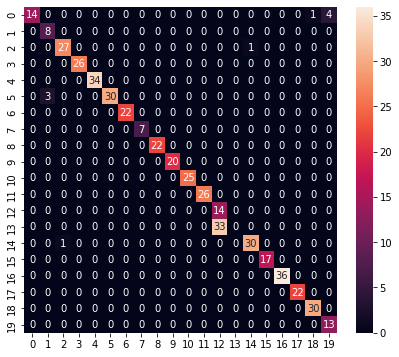

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.73      1.00      0.84         8
           2       0.96      0.96      0.96        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        34
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        26
          12       0.30      1.00      0.46        14
          13       0.00      0.00      0.00        33
          14       0.97      0.97      0.97        31
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        36
     

c:\users\jon\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jon\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jon\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [60]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [61]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jon\AppData\Local\Temp\tmpyl29cyse\assets


INFO:tensorflow:Assets written to: C:\Users\jon\AppData\Local\Temp\tmpyl29cyse\assets


7104

# 推論テスト

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [63]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.78 ms


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0030975e-06 8.3798824e-07 6.1867994e-01 7.1403906e-02 4.3582278e-07
 8.8057961e-10 1.2961569e-07 3.0519270e-06 5.3360918e-12 7.7522165e-20
 2.3029899e-25 1.2526832e-24 8.6778749e-18 9.9437744e-17 3.0991060e-01
 7.2293207e-09 4.2833384e-12 1.7049896e-13 1.3306965e-14 2.5296709e-15]
2
